In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
%config Completer.use_jedi = False

In [3]:
data=pd.read_excel('../Plastic database_Final_Ankita.xlsx')

In [4]:
df=pd.DataFrame(data)

In [5]:
df.columns

Index(['  ', 'doi', 'Microorganism', 'Microorganism_abb', 'taxa_no', 'Plastic',
       'Plastic_abb.', 'Plastic treatment/types', 'Comment', 'Evidence',
       'Sequence', 'GenbankID', 'Year', 'journal', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [6]:
df[['doi','Plastic','Year']]

,doi,Plastic,Year
0,10.1128/AEM.64.5.1731-1735.1998,BTA copolyester,[1998.0]
1,10.1007/s00253-014-5860-y,"Ecoflex (Terephthalic acid + 1,4-butandiol+adi...",[2014.0]
2,10.1007/s13205-017-0959-3,HDPE,[2017.0]
3,10.1111/j.1472-765X.2010.02883.x,HDPE,[2010.0]
4,10.1111/j.1472-765X.2010.02883.x,HDPE,[2010.0]
...,...,...,...
1682,10.3390/polym13203508,PS,NaN
1683,10.3390/polym13203508,PU,NaN
1684,10.3390/polym13203508,PE,NaN
1685,https://www.researchgate.net/publication/32612...,HDPE,NaN


In [7]:
df_year=df[['doi','Plastic_abb.','Year']].drop_duplicates()

In [8]:
plastic_selected=['HDPE',
 'LDPE',
 'Nylon',
 'PBS',
 'PBSA',
 'PCL',
 'PE',
 'PES',
 'PET',
 'PHA',
 'PHB',
 'PHBH',
 'PHBV',
 'PLA',
 'PP',
 'PS',
 'PU',
 'PVA',
 'PVC']

In [9]:
len(plastic_selected)

19

## From fresh

In [10]:
data1=pd.read_excel('../plastic_not_in_pubmed_added.xlsx')

In [11]:
data1.columns

Index([' ', 'Ref', 'doi', 'Microorganism', 'Plastic',
       'Plastic treaments/types', 'Comments', 'Evidence', 'Unnamed: 8',
       'GenbankID', 'Year', 'Sequence', 'title', 'abstract', 'Unnamed: 14',
       'name of journal', 'Unnamed: 16'],
      dtype='object')

In [12]:
data1_selected=data1[['doi','Plastic','Year']].drop_duplicates()

In [14]:
cd ../publication_year/

/home/sunny/Plastic final analysis /after kinshuk /publication_year


In [16]:
data2=pd.read_excel('plastic_with_pubmed.xlsx')

In [17]:
cd ../reanalysis\ before\ submission\ 28\ feb/

/home/sunny/Plastic final analysis /after kinshuk /reanalysis before submission 28 feb


In [18]:
data2.columns

Index(['title', 'abstract', 'doi', 'pmid', 'journal', 'Plastic', 'Evidence',
       'Microorganism', 'GenbankID', 'Year', 'Sequence'],
      dtype='object')

In [19]:
data2_selected=data2[['doi','Plastic','Year']].drop_duplicates()

In [20]:
data2_selected.head()

,doi,Plastic,Year
0,10.1128/AEM.64.5.1731-1735.1998,['BTA copolyester'],[1998.0]
1,10.1007/s00253-014-5860-y,"['Ecoflex', 'PHB', 'PCL', 'PBSA', 'PET', 'PLA'...",[2014.0]
2,10.1007/s13205-017-0959-3,['HDPE'],[2017.0]
3,10.1111/j.1472-765X.2010.02883.x,['HDPE'],[2010.0]
4,10.1007/s11356-014-3191-2,['HDPE'],[2014.0]


In [21]:
cd ../publication_year/

/home/sunny/Plastic final analysis /after kinshuk /publication_year


In [22]:
data3=pd.read_excel('extra_data.xlsx')

In [23]:
cd ../reanalysis\ before\ submission\ 28\ feb/

/home/sunny/Plastic final analysis /after kinshuk /reanalysis before submission 28 feb


In [24]:
data3_selected=data3[['doi','Plastic','year']].drop_duplicates()

## expend the individual dataset

In [25]:
cd ../publication_year/

/home/sunny/Plastic final analysis /after kinshuk /publication_year


In [26]:
data1_from=pd.read_excel('data2_selected.xlsx')

In [27]:
data1_from.columns

Index(['Unnamed: 0', 'doi', 'Plastic', 'Year'], dtype='object')

In [28]:
data1_from=data1_from[['doi', 'Plastic', 'Year']]

In [29]:
clean=[]
for index,row in data1_from.iterrows():
    for i in plastic_selected:
        for j in row['Plastic'].split(','):
            if i in j:
                if f"'{i}'" in j:
                      clean.append([row['doi'],row['Year'],i,j])

In [30]:
data1_clean=pd.DataFrame(clean,columns=['doi', 'Year','plastic','plastic_prev.'])

In [31]:
data1_clean.head()

,doi,Year,plastic,plastic_prev.
0,10.1016/j.polymdegradstab.2009.11.042,[2010.0],PBS,['PBS']
1,10.1016/j.polymdegradstab.2019.04.003,[2019.0],PBSA,['PBSA']
2,10.1016/0079-6700(90)90027-X,[1990.0],LDPE,'LDPE'
3,10.1023/A:1021873631162,[1998.0],LDPE,'LDPE'
4,10.17957/IJAB/15.0023,[2015.0],PHB,['PHB']


## data2

In [32]:
clean=[]
for index,row in data2_selected.iterrows():
    for i in plastic_selected:
        for j in row['Plastic'].split(','):
            if i in j:
                if f"'{i}'" in j:
                       clean.append([row['doi'],row['Year'],i,j]) 

In [33]:
data2_clean=pd.DataFrame(clean,columns=['doi', 'Year','plastic','plastic_prev.'])

In [34]:
data2_clean.head()

,doi,Year,plastic,plastic_prev.
0,10.1007/s00253-014-5860-y,[2014.0],PBS,'PBS']
1,10.1007/s00253-014-5860-y,[2014.0],PBSA,'PBSA'
2,10.1007/s00253-014-5860-y,[2014.0],PCL,'PCL'
3,10.1007/s00253-014-5860-y,[2014.0],PET,'PET'
4,10.1007/s00253-014-5860-y,[2014.0],PHB,'PHB'


In [35]:
for index,row in data2_clean.iterrows():
    print(index)
    print(row['Year'])

0
[2014.0]
1
[2014.0]
2
[2014.0]
3
[2014.0]
4
[2014.0]
5
[2014.0]
6
[2017.0]
7
[2010.0]
8
[2014.0]
9
[2015.0]
10
[2019.0]
11
[2016.0]
12
[2019.0]
13
[2019.0]
14
[2019.0]
15
[2018.0]
16
[2017.0]
17
[2017.0]
18
[2008.0]
19
[2017.0]
20
[2017.0]
21
[2014.0]
22
[2013.0]
23
[2016.0]
24
[2013.0]
25
[2012.0]
26
[2018.0]
27
[2016.0]
28
[2013.0]
29
[2010.0]
30
[1997.0]
31
[1999.0]
32
[2012.0]
33
[2017.0]
34
[2007.0]
35
[2003.0]
36
[2007.0]
37
[2005.0]
38
[2000.0]
39
[2004.0]
40
[2012.0]
41
[2012.0]
42
[2012.0]
43
[1999.0]
44
[1999.0]
45
[2004.0]
46
[2004.0]
47
[2004.0]
48
[2004.0]
49
[2004.0]
50
[2004.0]
51
[2012.0]
52
[2012.0]
53
[2016.0]
54
[2016.0]
55
[2005.0]
56
[2005.0]
57
[2005.0]
58
[2005.0]
59
[2005.0]
60
[2005.0]
61
[2008.0]
62
[2008.0]
63
[2008.0]
64
[2008.0]
65
[2008.0]
66
[2008.0]
67
[2019.0]
68
[2019.0]
69
[2019.0]
70
[2003.0]
71
[2003.0]
72
[2003.0]
73
[2003.0]
74
[2003.0]
75
[2002.0]
76
[2017.0]
77
[2017.0]
78
[2017.0]
79
[2017.0]
80
[2016.0]
81
[2016.0]
82
[2016.0]
83
[2012.0]
84

In [36]:
data2_clean.iloc[91]['Year']='[2001.0]'
data2_clean.iloc[92]['Year']='[2001.0]'
data2_clean.iloc[96]['Year']='[2018.0]'
data2_clean.iloc[97]['Year']='[2018.0]'

In [37]:
data2_clean['Year']=[ i[i.find('[')+1:i.find('.')] for i in data2_clean.Year]

## data3

In [38]:
data3_selected.head()

,doi,Plastic,year
0,10.1002/app.26328,LDPE,2007.0
1,10.1002/biot.201000391,PET,2011.0
2,10.1002/btpr.610,PET,2011.0
3,10.1002/ep.12467,LDPE,2016.0
5,10.1002/jctb.5489,PE,2017.0


In [39]:
clean=[]
for index,row in data3_selected.iterrows():
    for i in plastic_selected:
        if i in  row['Plastic']:
            #print(row['Plastic'])
            if f"'{i}'" in f"'{row['Plastic']}'":
                    #print(i,row['Plastic'])
                    clean.append([row['doi'],row['year'],i,row['Plastic']])                  
            

In [40]:
data3_clean=pd.DataFrame(clean,columns=['doi', 'Year','plastic','plastic_prev.'])

In [41]:
data_combine= pd.concat([data1_clean,data2_clean,data3_clean])

In [42]:
data_combine.head()

,doi,Year,plastic,plastic_prev.
0,10.1016/j.polymdegradstab.2009.11.042,[2010.0],PBS,['PBS']
1,10.1016/j.polymdegradstab.2019.04.003,[2019.0],PBSA,['PBSA']
2,10.1016/0079-6700(90)90027-X,[1990.0],LDPE,'LDPE'
3,10.1023/A:1021873631162,[1998.0],LDPE,'LDPE'
4,10.17957/IJAB/15.0023,[2015.0],PHB,['PHB']


In [43]:
len(data_combine['doi'].unique())

428

In [44]:
data_combine.shape

(591, 4)

In [45]:
data_combine[['doi', 'Year','plastic']].drop_duplicates()

,doi,Year,plastic
0,10.1016/j.polymdegradstab.2009.11.042,[2010.0],PBS
1,10.1016/j.polymdegradstab.2019.04.003,[2019.0],PBSA
2,10.1016/0079-6700(90)90027-X,[1990.0],LDPE
3,10.1023/A:1021873631162,[1998.0],LDPE
4,10.17957/IJAB/15.0023,[2015.0],PHB
...,...,...,...
114,http://www.journalcra.com/sites/default/files/...,2016.0,LDPE
115,http://www.journalcra.com/sites/default/files/...,2016.0,PU
116,https://www.researchgate.net/publication/32612...,2018.0,HDPE
117,https://www.researchgate.net/publication/32612...,2018.0,LDPE


In [46]:
plastic_selected

['HDPE',
 'LDPE',
 'Nylon',
 'PBS',
 'PBSA',
 'PCL',
 'PE',
 'PES',
 'PET',
 'PHA',
 'PHB',
 'PHBH',
 'PHBV',
 'PLA',
 'PP',
 'PS',
 'PU',
 'PVA',
 'PVC']

In [47]:
Carbon = ['PP', 'PS','PE','HDPE', 'LDPE','PVA','PVC']

In [48]:
clas=[]
for _,row in data_combine.iterrows():
    if row['plastic'] in Carbon:
        clas.append('Non-hydrolyzable')
    else:
        clas.append('Hydrolyzable')

In [49]:
data_combine['Plastic class']=clas

In [50]:
data_combine.head()

,doi,Year,plastic,plastic_prev.,Plastic class
0,10.1016/j.polymdegradstab.2009.11.042,[2010.0],PBS,['PBS'],Hydrolyzable
1,10.1016/j.polymdegradstab.2019.04.003,[2019.0],PBSA,['PBSA'],Hydrolyzable
2,10.1016/0079-6700(90)90027-X,[1990.0],LDPE,'LDPE',Non-hydrolyzable
3,10.1023/A:1021873631162,[1998.0],LDPE,'LDPE',Non-hydrolyzable
4,10.17957/IJAB/15.0023,[2015.0],PHB,['PHB'],Hydrolyzable


In [51]:
cd ../reanalysis\ before\ submission\ 28\ feb

/home/sunny/Plastic final analysis /after kinshuk /reanalysis before submission 28 feb


TypeError: 'value' must be an instance of str or bytes, not a float

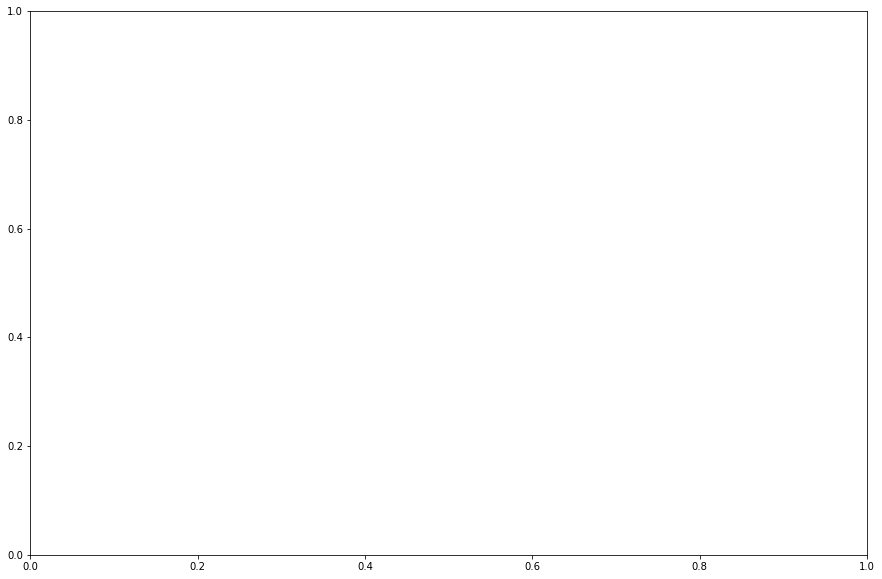

In [52]:
f, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data_combine, x="Year", hue="Plastic class", multiple="stack",
             edgecolor=".3",
    linewidth=.8,ax=ax)
ax.set_title(' Annual trends of publications for Hydrolyzable and Non-Hydrolyzable plastic types',fontsize=20)
ax.set_ylabel('Number of publications',fontsize=14)
ax.set_xlabel('Years',fontsize=14)
ax.legend(['Hydrolyzable','Non-hydrolyzable'], 
           prop = {'size' : 14}, 
           loc = 'upper left', shadow = True,
           )
f.savefig('Annual_publication_trend.png')
ax.set_xticks([i for i in range(1990,2022,2)])

In [53]:
data_combine['Year']=[int(i) for i in data_combine['Year']]

ValueError: invalid literal for int() with base 10: '[2010.0]'

In [54]:
data_combine['Year']

0      [2010.0]
1      [2019.0]
2      [1990.0]
3      [1998.0]
4      [2015.0]
         ...   
114      2016.0
115      2016.0
116      2018.0
117      2018.0
118      2018.0
Name: Year, Length: 591, dtype: object

In [64]:
val=[]
for i in data_combine.Year:
    if '[' in str(i):
        val.append(i[i.find('[')+1:i.find('.')])
    else:
        val.append(i)

In [65]:
len(val)

591

In [66]:
data_combine['Year']=val

In [67]:
data_combine['Year']=[int(i) for i in data_combine['Year']]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

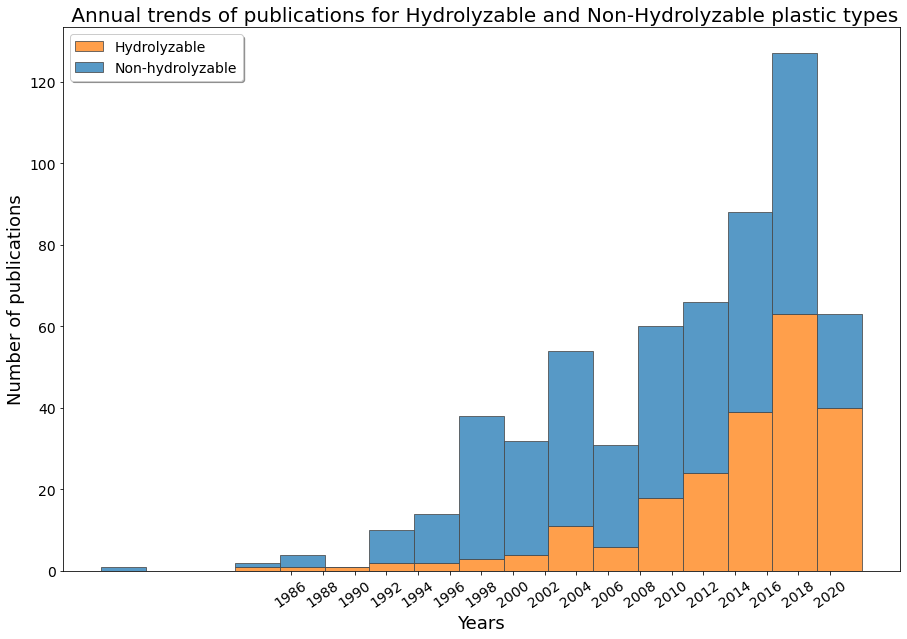

In [75]:
f, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data_combine, x="Year", hue="Plastic class", multiple="stack",
             edgecolor=".3",
    linewidth=.8,ax=ax)
ax.set_title(' Annual trends of publications for Hydrolyzable and Non-Hydrolyzable plastic types',fontsize=20)
ax.set_ylabel('Number of publications',fontsize=18)
ax.set_xlabel('Years',fontsize=18)
ax.legend(['Hydrolyzable','Non-hydrolyzable'], 
           prop = {'size' : 14}, 
           loc = 'upper left', shadow = True,
           )
f.savefig('Annual_publication_trend.png')
ax.set_xticks([i for i in range(1986,2022,2)],)
plt.xticks(fontsize=14,rotation=35)
plt.yticks(fontsize=14)
plt.savefig("year_process_plot.eps")
plt.show()